# <img style='float: left' src="http://lightning-viz.github.io/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Matrix plots in <a href='http://lightning-viz.github.io/'><font color='#9175f0'>Lightning</font></a>

## <hr> Configuracion

In [1]:
from lightning import Lightning

from numpy import random, arange, asarray, corrcoef, argsort, array
import networkx as nx


## Conexion al Servidor


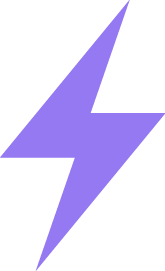

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True)


## <hr> Matrix simple

Las matrices son formas útiles para visualizar tablas de datos densos.
<br>
En primer lugar mostramos una matriz aleatoria con estilos predeterminados .
<br>
Usted puede usar las flechas para cambiar el contraste (arriba/abajo) o el colormap (izquierda/derecha)


In [3]:
mat = random.randn(10,10)
lgn.matrix(mat)

## <hr> Formas diferentes

Matrices rectanglulares se adecuaran al tamaño automaticamente.

In [4]:
mat = random.randn(10,20)
lgn.matrix(mat)

In [5]:
mat = random.randn(20,10)
lgn.matrix(mat)

## <hr> Colores

Las matrices se pueden representar usando algun colorbrewer colormaps.

In [6]:
mat = random.rand(10,10)
lgn.matrix(mat, colormap='Reds')

In [7]:
mat = random.rand(10,10)
lgn.matrix(mat, colormap='Spectral')

## <hr> Etiquetas


Puede etiquetar las filas y columnas de una matriz . 
Al hacer clic en las etiquetas de texto se hará hincapié en las filas y columnas.

In [8]:
n, m = (10, 7)
mat = arange(n*m).reshape(n,m)
rows = ['row ' + str(i) for i in range(n)]
columns = ['col ' + str(i) for i in range(m)]

lgn.matrix(mat, row_labels=rows, column_labels=columns)

También se puede activar en el etiquetado de las celdas por su valor 

In [9]:
mat = arange(n*m).reshape(n,m)
print mat

lgn.matrix(mat, numbers=True)

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]
 [49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62]
 [63 64 65 66 67 68 69]]


## Ejemplo Matrix con valores extraidos desde la base de datos

In [10]:
import psycopg2, psycopg2.extras
try:
    conn = psycopg2.connect("dbname='gp' user='roma' host='localhost' password='roma'")
except:
    print "I am unable to connect to the database"
cur = conn.cursor()

In [11]:
cur.execute("""SELECT cantidad,nomempresa from produccion inner join empresas on produccion.idempresa=empresas.idempresa where anio=2004 and idsubtipo =2""")
rows = cur.fetchall()
i=0
x=[]
y=[]
columns=[2004,2005,2006,2007]
nomEmpresa=[]
for row in rows:
    i=i+1
    x.append(int(row[0]))
    
    if i == 4:
        nomEmpresa.append(row[1])
        y.append(x)
        del x
        x=[]
        i=0 

## Energia  producida por Biomasa 

<br> 
La siguiente grafica nos muestra la energia producida por 8 empresas electricas en el que se refleja la cantidad producida en cada una e las parcelas coloreadas , segun su opacidad tendran un valor mas alto y mientras mas claras sean su valor sera mas reducido

In [12]:
lgn.matrix(y,row_labels=nomEmpresa,column_labels=columns, colormap='Blues',numbers=True)